## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8460 – Traitement automatique de la langue naturelle <br> </center>
## <center> TP3 INF8460 <br>  Automne 2021 </center>

## 1. DESCRIPTION
Dans ce TP, vous aurez la tâche d’extraire des mots-clés à partir de textes (sous-tâche A) ainsi que leur type (sous-tâche B).  Le problème est un problème de prédiction de séquence à séquence. Pour les sous-tâches A et B, on veut prédire un label en sortie par jeton (token) en entrée.

__Exemple de sortie pour A et B :__

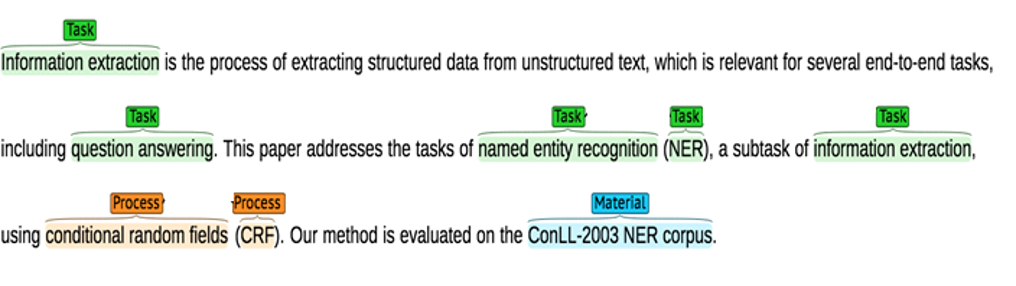


__Sous-tâche (A):__ Identification de mots-clé

Exemple de format de soumission attendu : 

__DocID__ &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; __TokenID__  &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; __Token__ &emsp;&emsp; __Tag__ <br>
S0370269304007567 &emsp; S0370269304007567-0 &emsp; the &emsp; &emsp; &emsp; O <br>
S0370269304007567 &emsp; S0370269304007567-1 &emsp; oxidation  &emsp; U <br>
S0370269304007567 &emsp; S0370269304007567-2 &emsp; of &emsp; &emsp; &emsp; &ensp; O <br>

__Sous-tâche (B) :__ Classification des mots-clés en types prédéfinis. Dans cette tâche, vous aurez non seulement à identifier les mots-clés mais aussi à leur assigner un type.

Exemple de format de soumission attendu  : 

__DocID__ &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; __TokenID__  &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; __Token__ &emsp;&emsp; __Tag__ <br>
S0370269304007567 &emsp; S0370269304007567-0 &emsp; the &emsp; &emsp; &emsp; O <br>
S0370269304007567 &emsp; S0370269304007567-1 &emsp; oxidation &emsp; U-P <br>
S0370269304007567 &emsp; S0370269304007567-2 &emsp; of &emsp; &emsp; &emsp; &ensp; O <br>

Dans ce projet, vous avez le choix de vous attaquer à une seule sous-tâche (A) ou à effectuer les tâches A et B. Dans le cas où vous ne résoudrez que la sous-tâche A, votre projet obtiendra une note maximale de 80%.

Les équipes qui s’attaqueront aux tâches A et B pourront obtenir une note maximale de 100%.


## 2. LIBRARIES PERMISES
- HuggingFace
- Keras
- ScikitLearn
- NLTK
- SPACY
- Pour toute autre librairie, demandez à votre chargé de laboratoire via le forum du cours sur Moodle


## 3. INFRASTRUCTURE

- Vous avez accès aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)
- Vous pouvez aussi utiliser l’environnement Google Colab :  https://colab.research.google.com/

## 4. ÉCHÉANCE

Fin de la session. La date précise sera indiquée sur Moodle.

## 5. KAGGLE

Le TP3-projet se fera sous forme d’une compétition Kaggle.  Vous devrez utiliser l’environnement Kaggle pour l’évaluation de vos approches.  

Pour tester votre système au fur et à mesure, vous aurez le droit à 4 soumissions par jour sur Kaggle. Vous verrez deux types de résultats sur votre « private leaderboard » et votre « public leaderboard » :

- Le « public leaderboard » est calculé sur approximativement 30% des données de test, choisies aléatoirement par Kaggle. Ce score est public et est calculé sur la même tranche de données pour tous les participants. 
- Le « private leaderboard » est calculé sur approximativement 70% des données de test et n’est visible qu’à la fin de la compétition. Le résultat final sera basé sur ce leaderboard. Si aucune soumission n’est choisie, la soumission avec le meilleur score sur le « public leaderboard » sera utilisée pour calculer le score sur le « private leaderboard ».

Pour l’évaluation sur Kaggle, vous devrez soumettre un fichier de données submission_test_A.csv et/ou submission_test B.csv du même format que le fichier sample_submission.csv (disponible sur le site de la compétition et Moodle). Submission_test_(A ou B).csv devra contenir pour chaque ligne de votre ensemble de test, la réponse retournée par votre approche, selon le format indiqué dans la compétition. Vous devrez aussi générer le fichier Submission_val_(A ou B).csv sur l’ensemble de validation.

Dans le projet INF8460, notre classement comprendra deux leaderboards distincts : 
- Un leaderboard pour les modèles de la sous-tâche A
- Un leaderboard pour les modèles de la sous-tâche B

Chaque équipe doit soumettre ses résultats à un des leaderboards (A) ou aux deux (A et B), selon son choix. 

## 6. DESCRIPTION DES DONNEES ET METRIQUES D’EVALUATION

Le corpus est un corpus de 500 paragraphes extraits de publications scientifiques dans les domaines de l’informatique, de la physique et de la science des matériaux. 3 types de documents sont fournis dans des fichiers zip pour les ensembles d’entrainement et de validation : 
- Les paragraphes dans les fichiers .txt
- Les documents entiers dont les paragraphes ont été extraits dans des fichiers .xml 
- Les annotations qui indiquent les mots-clés dans des fichiers .ann. Veuillez ne tenir compte que des lignes marquées Ti (T1, T2, etc.)

Notez qu’il vous est possible de travailler uniquement avec les fichiers .txt et .ann (à vous de voir si les xml seront utiles).

Pour l’ensemble de test, seuls les fichiers .txt et .xml sont fournis.

L’ensemble d’entrainement consiste en 350 documents, l’ensemble de validation et de test contiennent chacun 100 documents. 
Nous vous fournissons également 3 csv :
- train.csv
- val.csv
- test.csv
Ces fichiers contiennent tous les jetons (tokens) de chaque document.txt. Vous aurez à compléter la colonne tag au format demandé ci-dessous.

La sortie de votre modèle sera comparée à notre ensemble de référence de test sur Kaggle. Le leaderboard Kaggle utilisera la métrique f1-score.

## 7. ETAPES DU TP

A partir du notebook inf8460_A21_TP3 qui est distribué, vous devez réaliser les étapes suivantes. (Notez que les cellules dans le squelette sont là à titre informatif, il est fort probable que vous rajoutiez des sections au fur et à mesure de votre TP).

Ci-dessous définir la constante _PATH_ qui doit être utilisée par votre code pour accéder aux fichiers. Il est attendu que pour la correction, le chargé de lab n'ait qu'à changer la valeur de _PATH_ pour le répertoire où se trouver les fichiers de datasets.

In [27]:
PATH = "./Dataset/"

In [28]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3060 Laptop GPU


### 7.1. Etat de l’art (10%)

Décrivez en deux paragraphes, dans une cellule du notebook, l’état de l’art pour la reconnaissance de mots clé et leur annotation. Utilisez le service Google Scholar. Voici quelques mots-clé (non exhaustifs) : Named Entity recognition, NER, entity typing.  

Quelles sont les meilleures techniques de l’état de l’art ?

### 7.2. Extraction d’information

#### 7.2.1. Sous-tâche A : Identification des mots-clés (65%)

Dans la sous-tâche A, la tâche est de prédire les types BILOU pour les jetons en dehors (Outside), au début (Beginning) ou dans un mot-clé (Inside). Voir plus de détails ci-dessous.

__a)Format (5%) :__ En partant des fichiers csv de l’ensemble d’entrainement (train) et de validation (val), générez un fichier train_A_bilou.csv et val_A_bilou.csv de format de type BILOU en complétant la colonne tag des fichiers train.csv et val.csv: 

    B :’Beginning’ :  Premier jeton d’une entité composée de multiples jetons
    I : ‘Inside’ : Jeton interne d’une entité composée de multiples jetons
    L : ‘Last’ : Dernier jeton d’une entité composée de multiples jetons
    O : ‘Outside’: Un jeton qui ne représente pas une entité 
    U : ‘Unit’ : Une entité composée d’un seul jeton

Ici, entité réfère aux mots-clés que vous devez identifier.

### Charger du texte et le traiter pour pouvoir ajouter la bonne balise (tag) au csv

In [29]:
import re
import string

def clean_word(word):
    if(type(word) != type('')):
        return clean_word(str(word))
    elif word.startswith("'"):
        return word
    punctuations ='!"#$%&\'()*+,.-−:;<=>?@[\\]^_`{|}~“”‘’'
    
    #remove left
    while len(word) > 0 and word[0] in punctuations:
        word = word[1:]
    
    # remove right
    while len(word) > 0 and word[-1] in punctuations:
        word = word[:-1]
    return word

def clean_words(words):
    seperators = "[](),>"
    special_seperator = "'"
    words = list(map(clean_word, words))
    
    # remove the words that are made of nothing (initially just punctuation)
    words = [word for word in words if len(word) != 0]
    
    ans = []
    for word in words:
        temp = []
        index_sep = 0
        #normal seperator
        while index_sep < len(seperators) and len(temp) == 0:
            if seperators[index_sep] in word:
                temp = word.split(seperators[index_sep])
            index_sep += 1
        if len(temp) == 0:
            index_sep = 0
            while index_sep < len(special_seperator) and len(temp) == 0:
                if special_seperator[index_sep] in word:
                    temp = word.split(special_seperator[index_sep])
                    temp[1] = special_seperator[index_sep] + temp[1]
                index_sep += 1
        if len(temp) == 0:
            ans.append(word)
        else:
            ans += temp
    return ans

def get_ordered_info_ann(filename):
    temp = []
    with open(filename, 'r', encoding="utf8") as f:
      for l in f:
        line = re.split('\s', l.strip())
        if line[0][0] == "T":
            # clean after wrong ann
            while not (line[2].isdecimal() and line[3].isdecimal()):
                if(not line[2].isdecimal()):
                    line.pop(2)
                elif(not line[3].isdecimal()):
                    line.pop(3)
            
            mark, wtype, start, end, words  = line[0], line[1], int(line[2]), int(line[3]), line[4:]
            words = clean_words(words)
            temp.append((wtype, start, end, words))
            
    
    # sort the temp
    temp = sorted(temp, key=lambda x: (x[1], -x[2]))
    
    
    index = 0
    infos = []
    while index < len(temp):
        wtype, start, end, words = temp[index]
        word_type = []
        if len(words) == 1:
            word_type.append((words[0], 'U'))
            index += 1
        else:
            for i in range(len(words)):
                if(i == 0):
                    word_type.append((words[i], 'B'))
                elif(i == len(words)-1):
                    word_type.append((words[i], 'L'))
                else:
                    word_type.append((words[i], 'I'))
            
            #check if there is redondancies in the next element
            new_index = index + 1
            while new_index < len(temp) and temp[new_index][1] < end:
                repeated_words = temp[new_index][3]
                if len(repeated_words) == 1 and repeated_words[0] in words:
                    matching_index = words.index(repeated_words[0])
                    word_type[matching_index] = (repeated_words[0], 'U')
                else:
                    for i in range(len(repeated_words)):
                        if repeated_words[i] not in words:
                            continue
                        matching_index = words.index(repeated_words[i])
                        if(i == 0):
                            word_type[matching_index] = (repeated_words[i], 'B')
                        elif(i == len(repeated_words)-1):
                            word_type[matching_index] = (repeated_words[i], 'L')
                        else:
                            word_type[matching_index] = (repeated_words[i], 'I')
                new_index += 1
            index = new_index
        infos += word_type
    
    """
    #remove the unique duplicates
    ans = []
    for i in range(0, len(infos) - 1):
        if not (infos[i][1] == 'U' and infos[i] == infos[i+1]):
            ans.append(infos[i])
    """
    
    return infos

In [30]:
import pandas as pd

def add_dataframe_tags(df, data_path):
    # add the tags to the dataframe
    tagged_words = []
    last_doc = ""

    df["Tag"] = df["Tag"].astype(str)
    number_wrong = 0

    for index, row in df.iterrows():
        doc = row["DocID"]
        
        """
        if len(tagged_words) > 0 and doc == "S0022311513011422":
            print("Token : ", row["Token"])
            print("First tagged : ", tagged_words[0])
        """

        if doc != last_doc:
            if last_doc != "" and len(tagged_words) != 0:
                print(last_doc)
                print(tagged_words)
                number_wrong += 1
            tagged_words = get_ordered_info_ann(data_path + doc + ".ann")
            last_doc = doc

        tag = 'O'
        cleaned_word = clean_word(row['Token'])

        if len(tagged_words) > 0:
            similar = (cleaned_word == tagged_words[0][0] or row['Token'] == tagged_words[0][0])
            
            semi_similar = (len(cleaned_word) >= 3 and cleaned_word in tagged_words[0][0]) or (len(str(row['Token'])) >= 3 and str(row['Token']) in tagged_words[0][0]) or (len(tagged_words[0][0]) >= 3 and tagged_words[0][0] in str(row['Token']))
            if similar:
                tag = tagged_words.pop(0)[1]
            elif tagged_words[0][0] == "null" and cleaned_word == "nan":
                tag = tagged_words.pop(0)[1]
            elif semi_similar:
                token = str(row['Token'])
                if tagged_words[0][0] in token:
                    while tagged_words[0][0] in token:
                        token = token.replace(tagged_words[0][0], "")
                        tag = tagged_words.pop(0)[1]
                else:
                    tag = tagged_words.pop(0)[1]
            """
            elif len(tagged_words) > 1 and (cleaned_word == tagged_words[1][0] or row['Token'] == tagged_words[1][0]):
                tagged_words.pop(0)[1] # element too much (hasn't been able to be found)
                tag = tagged_words.pop(0)[1]
            """

        df.at[index, "Tag"] = tag
    
    print(tagged_words)
    print(df)
    print("Wrong : ", number_wrong)
    
# train csv

TRAIN_PATH = PATH + "train/"
UNLABELED_TRAIN_PATH = PATH +  "train.csv"
SAVED_TRAIN_PATH = PATH + "train_A_bilou.csv"

df = pd.read_csv(UNLABELED_TRAIN_PATH)
add_dataframe_tags(df, TRAIN_PATH)
df.to_csv(SAVED_TRAIN_PATH)


# val csv
VAL_PATH = PATH + "val/"
UNLABELED_VAL_PATH = PATH + "val.csv"
SAVED_VAL_PATH = PATH + "val_A_bilou.csv"

df = pd.read_csv(UNLABELED_VAL_PATH)
add_dataframe_tags(df, VAL_PATH)
df.to_csv(SAVED_VAL_PATH)

# testing path
UNLABELED_TEST_PATH = PATH + "test.csv"
SAVED_TEST_PATH = PATH + "test_A_bilou.csv"


[]
                   DocID                TokenID     Token Tag
0      S0022311514001640    S0022311514001640-0       The   O
1      S0022311514001640    S0022311514001640-1    vapour   B
2      S0022311514001640    S0022311514001640-2     phase   L
3      S0022311514001640    S0022311514001640-3  consists   O
4      S0022311514001640    S0022311514001640-4        of   O
...                  ...                    ...       ...  ..
64177  S0370269304009979  S0370269304009979-187   various   O
64178  S0370269304009979  S0370269304009979-188     brane   B
64179  S0370269304009979  S0370269304009979-189     world   I
64180  S0370269304009979  S0370269304009979-190    models   L
64181  S0370269304009979  S0370269304009979-191         .   O

[64182 rows x 4 columns]
Wrong :  0
[]
                   DocID                TokenID            Token Tag
0      S0301010415300355    S0301010415300355-0    Alternatively   O
1      S0301010415300355    S0301010415300355-1               to   O
2     

__b)Modèle (50%) :__
- Entrainez un modèle à reconnaitre les mots-clés à partir de votre fichier train_A_bilou.csv .
- Votre modèle doit retourner les tags pour l’ensemble de validation et de test en suivant le format indiqué dans sample_submission.csv
- Vous utiliserez le fichier val_A_bilou.csv pour déterminer vos hyper-paramètres optimaux, et effectuer une évaluation de votre modèle. 

### Modèle :

Nous avons chosis d'implémenter le modèle BERT pour le tagging BILOU.

In [31]:
from transformers import BertTokenizer
import numpy as np
import pandas as pd

# read the training data
df = pd.read_csv(SAVED_TRAIN_PATH)
print(df.head())

# read the validation data
df_val = pd.read_csv(SAVED_VAL_PATH)

# read the testing data
df_test = pd.read_csv(UNLABELED_TEST_PATH)

# Map each unique label to an integer.
unique_labels = df["Tag"].unique().tolist()
label_map = {label : i for i, label in enumerate(unique_labels)}

# Creating the BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


   Unnamed: 0              DocID              TokenID     Token Tag
0           0  S0022311514001640  S0022311514001640-0       The   O
1           1  S0022311514001640  S0022311514001640-1    vapour   B
2           2  S0022311514001640  S0022311514001640-2     phase   L
3           3  S0022311514001640  S0022311514001640-3  consists   O
4           4  S0022311514001640  S0022311514001640-4        of   O


In [32]:
def get_sentences_and_labels(tdf):
    sentences = []
    token_col =  ' '.join(tdf["Token"].astype(str).replace(['!', '?'], value='.').tolist())
    sentences = token_col.split(" . ")
    sentences[-1] = sentences[-1].replace(" .", "") # the last dot doesn't have a space after the dot

    labels = tdf.loc[(tdf['Token'] != "!") & (tdf['Token'] != ".") & (tdf['Token'] != "?")]["Tag"].tolist()

    # change the format of the labels and sentences so that each word is in a list and each of these sentence in a list
    temp_labels = []
    index = 0
    for i in range(len(sentences)):
        sentences[i] = sentences[i].split(" ")
        temp_labels.append([])
        for j in range(len(sentences[i])):
            temp_labels[i].append(labels[index])
            index += 1

    labels = temp_labels
    return sentences, labels


# Getting all of the train sentences and labels
train_sentences, train_labels = get_sentences_and_labels(df)

# Getting all of the val sentences and labels
val_sentences, val_labels = get_sentences_and_labels(df_val)

# Getting all of the test sentences
test_sentences, _ = get_sentences_and_labels(df_test)

### Nouvelle segmentation avec un Bert Tokenizer

In [35]:
def get_input_ids_and_attention_masks(sentences):
    input_ids = []
    attention_masks = []

    for sent in sentences:
        encoded_dict = tokenizer.encode_plus(
                            sent,                  # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            truncation = True,
                            max_length = 50,           # Pad & truncate all sentences.
                            padding = 'max_length',
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                       )

        # Add the encoded sentence to the list.    
        input_ids.append(encoded_dict['input_ids'][0])

        # And its attention mask (simply differentiates padding from non-padding).
        attention_masks.append(encoded_dict['attention_mask'][0])
    return input_ids, attention_masks

# training part
train_input_ids, train_attention_masks = get_input_ids_and_attention_masks(train_sentences)

#validation part
val_input_ids, val_attention_masks = get_input_ids_and_attention_masks(val_sentences)

# testing part
test_input_ids, test_attention_masks = get_input_ids_and_attention_masks(test_sentences)
 

In [36]:
print("Training : ")
print(len(train_input_ids))
print(len(train_labels))
print(len(train_input_ids))
print(len(train_attention_masks))

print()
print("Validation : ")
print(len(val_input_ids))
print(len(val_labels))
print(len(val_input_ids))
print(len(val_attention_masks))

print()
print("Testing : ")
print(len(test_input_ids))
print(len(test_input_ids))
print(len(test_attention_masks))

Training : 
2422
2422
2422
2422

Validation : 
412
412
412
412

Testing : 
827
827
827


### Ajouter les labels Null

In [37]:
def get_BERT_new_labels(input_ids, labels):
    # Ajouter les labels Null
    new_labels = []

    # The special label ID we'll give to "extra" tokens.
    null_label_id = -100

    # For each sentence...
    for (sen, orig_labels) in zip(input_ids, labels):

        # Create a new list to hold the adjusted labels for this sentence.
        padded_labels = []

        # This will be our index into the original label list.
        orig_labels_i = 0 

        # For each token in the padded sentence...
        for token_id in sen:

            # Pull the value out of the tensor.
            token_id = token_id.numpy().item()

            # If `[PAD]`, `[CLS]`, or `[SEP]`...
            if (token_id == tokenizer.pad_token_id) or \
                (token_id == tokenizer.cls_token_id) or \
                (token_id == tokenizer.sep_token_id):

                # Assign it the null label.
                padded_labels.append(null_label_id)

            # If the token string starts with "##"...
            elif tokenizer.ids_to_tokens[token_id][0:2] == '##':

                # It's a subword token, and not part of the original dataset, so
                # assign it the null label.
                padded_labels.append(null_label_id)

            # If it's not any of the above...
            else:

                # This token corresponds to one of the original ones, so assign it
                # it's original label.

                # Look up the label for this token.
                label_str = orig_labels[orig_labels_i]

                # Map the label to its ID, and assign it.
                padded_labels.append(label_map[label_str])

                # Increment our index into the original labels list.
                orig_labels_i += 1

        # If we did this right, then the new `padded_labels` list should match
        # the length of the tokenized sentence.
        assert(len(sen) == len(padded_labels))    

        # Store the updated labels list for this sentence.
        new_labels.append(padded_labels)
    return new_labels

# training part
train_new_labels = get_BERT_new_labels(train_input_ids, train_labels)

# validation part
val_new_labels = get_BERT_new_labels(val_input_ids, val_labels)


In [38]:
print("Training : ")
print('\nSentence:    ', train_sentences[2])
print('\nLabels:      ', train_labels[2])
print('\nBERT Tokens: ', tokenizer.tokenize(' '.join(train_sentences[2])))
print('\nToken IDs:   ', train_input_ids[2])
print('\nNew Labels:  ', train_new_labels[2])
print('\nMask:        ', train_attention_masks[2])
print("")

print("Validation : ")
print('\nSentence:    ', val_sentences[2])
print('\nLabels:      ', val_labels[2])
print('\nBERT Tokens: ', tokenizer.tokenize(' '.join(val_sentences[2])))
print('\nToken IDs:   ', val_input_ids[2])
print('\nNew Labels:  ', val_new_labels[2])
print('\nMask:        ', val_attention_masks[2])

print("Testing : ")
print('\nSentence:    ', test_sentences[2])
print('\nBERT Tokens: ', tokenizer.tokenize(' '.join(test_sentences[2])))
print('\nToken IDs:   ', test_input_ids[2])
print('\nMask:        ', test_attention_masks[2])

Training : 

Sentence:     ['This', 'carbon', 'is', 'likely', 'to', 'precipitate', 'on', 'the', 'surface', 'of', 'the', 'SiC', 'grains', ',', 'a', 'process', 'that', 'becomes', 'very', 'rapid', 'as', 'the', 'temperature', 'approaches', '2100K', '[', '24', ']']

Labels:       ['O', 'U', 'O', 'O', 'O', 'B', 'I', 'I', 'I', 'I', 'I', 'B', 'L', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

BERT Tokens:  ['this', 'carbon', 'is', 'likely', 'to', 'pre', '##ci', '##pit', '##ate', 'on', 'the', 'surface', 'of', 'the', 'sic', 'grains', ',', 'a', 'process', 'that', 'becomes', 'very', 'rapid', 'as', 'the', 'temperature', 'approaches', '210', '##0', '##k', '[', '24', ']']

Token IDs:    tensor([  101,   100,  6351,  2003,  3497,  2000,   100,  2006,  1996,  3302,
         1997,  1996,   100, 17588,  1010,  1037,  2832,  2008,  4150,  2200,
         5915,  2004,  1996,  4860,  8107,   100,  1031,  2484,  1033,   102,
            0,     0,     0,     0,     0,     0,     0

### Préparation des données d'entrainement et de validation

In [39]:
import torch
# Convert the lists into PyTorch tensors.

# `input_ids` is a list of tensor arrays--stack them into a matrix with size
# [7,660  x  50].
train_pt_input_ids = torch.stack(train_input_ids, dim=0)

# `attention_masks` is a list of tensor arrays--stack them into a matrix with
# size [7,660  x  50].
train_pt_attention_masks = torch.stack(train_attention_masks, dim=0)

# Labels is a list of lists. Convert it into a tensor matrix with size 
# [7,660  x  50].
train_pt_labels = torch.tensor(train_new_labels, dtype=torch.long)


# validation

val_pt_input_ids = torch.stack(val_input_ids, dim=0)
val_pt_attention_masks = torch.stack(val_attention_masks, dim=0)
val_pt_labels = torch.tensor(val_new_labels, dtype=torch.long)

# testing
test_pt_input_ids = torch.stack(test_input_ids, dim=0)
test_pt_attention_masks = torch.stack(test_attention_masks, dim=0)

In [41]:
print("Training :")
print(train_pt_input_ids.shape)
print(train_pt_attention_masks.shape)
print(train_pt_labels.shape)

print("\nValidation : ")
print(val_pt_input_ids.shape)
print(val_pt_attention_masks.shape)
print(val_pt_labels.shape)

print("\nTesting : ")
print(test_pt_input_ids.shape)
print(test_pt_attention_masks.shape)


Training :
torch.Size([2422, 50])
torch.Size([2422, 50])
torch.Size([2422, 50])

Validation : 
torch.Size([412, 50])
torch.Size([412, 50])
torch.Size([412, 50])

Testing : 
torch.Size([827, 50])
torch.Size([827, 50])


In [42]:
# entrainement et validation
from torch.utils.data import TensorDataset

# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(train_pt_input_ids, train_pt_attention_masks, train_pt_labels)
val_dataset = TensorDataset(val_pt_input_ids, val_pt_attention_masks, val_pt_labels)
test_dataset = TensorDataset(test_pt_input_ids, test_pt_attention_masks)

In [43]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
            )

# For testing the order doesn't matter, so we'll just read them sequentially.
testing_dataloader = DataLoader(
            test_dataset, # The validation samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
            )

### Entrainement du modèle de classification BERT

In [44]:
from transformers import BertForTokenClassification, AdamW, BertConfig

# Load BertForTokenClassification 
model = BertForTokenClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = len(label_map) + 1, # The number of output labels--18 for our NER dataset
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [45]:
# Load the AdamW optimizer
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate 
                  eps = 1e-8 # args.adam_epsilon 
                )


In [46]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs 
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [47]:
import time
import numpy as np
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertfortokenclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.TokenClassifierOutput
        result = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        loss = result.loss

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...


In [ ]:
import pickle
torch.save(model.state_dict(), "saved_model.pt")

# save the loss_values in case we will need it
LOSS_VALUES_PATH = "loss_values.pkl"
with open(LOSS_VALUES_PATH, 'wb') as handle:
    pickle.dump(loss_values, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# load the data that has been saved

model = torch.load(PATH)
model.eval()

with open(LOSS_VALUES_PATH, 'rb') as handle:
    loss_values = pickle.load(handle)


__c)Évaluation (10%) :__
Vous devez calculer les métriques de précision, rappel et F1-score de votre modèle sur l’ensemble de validation. Votre fichier val_A_bilou.csv avec la colonne Tag complétée constitue alors votre référence.
- Affichez une table comparant les performances de votre modèle pour chaque tag (B, I, L, O, U) ainsi que la performance globale sous forme de moyenne micro.
- Générez les réponses de votre modèle sur l’ensemble de validation et stockez-les dans le fichier submission_val_A.csv, sur le modèle du fichier sample_submission.csv
- Générez les réponses de votre modèle sur l’ensemble de test et stockez-les dans le fichier submission_test_A.csv sur le modèle du fichier sample_submission.csv
- Kaggle : Vous devez soumettre votre fichier de soumission submission_test_A.csv sur Kaggle, où il sera évalué. Ce fichier doit être généré avec votre meilleur modèle au moment de sa soumission pour évaluation sur Kaggle. Notez que vous pourrez faire des soumissions jusqu’à la date de remise et vous comparer aux performances des autres équipes. 

### Find the metrics for the validation set

In [ ]:
# Prediction on val set

print('Predicting labels for {:,} val sentences...'.format(len(pt_input_ids)))

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in validation_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      result = model(b_input_ids, 
                      token_type_ids=None, 
                      attention_mask=b_input_mask,
                      return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')


In [ ]:
# First, combine the results across the batches.
all_predictions = np.concatenate(predictions, axis=0)
all_true_labels = np.concatenate(true_labels, axis=0)

print("After flattening the batches, the predictions have shape:")
print("    ", all_predictions.shape)

# Next, let's remove the third dimension (axis 2), which has the scores
# for all 18 labels. 

# For each token, pick the label with the highest score.
predicted_label_ids = np.argmax(all_predictions, axis=2)

print("\nAfter choosing the highest scoring label for each token:")
print("    ", predicted_label_ids.shape) 

# Finally, for the sake of scoring, we don't actually care about the different
# sentences--we just look at whether the model made correct predictions for the
# individual tokens.

# Eliminate axis 0, which corresponds to the sentences.
predicted_label_ids = np.concatenate(predicted_label_ids, axis=0)
all_true_labels = np.concatenate(all_true_labels, axis=0)

print("\nAfter flattening the sentences, we have predictions:")
print("    ", predicted_label_ids.shape)
print("and ground truth:")
print("    ", all_true_labels.shape)


# Construct new lists of predictions which don't include any null tokens.
real_token_predictions = []
real_token_labels = []

# For each of the input tokens in the dataset...
for i in range(len(all_true_labels)):

    # If it's not a token with a null label...
    if not all_true_labels[i] == -100:
        
        # Add the prediction and the ground truth to their lists.
        real_token_predictions.append(predicted_label_ids[i])
        real_token_labels.append(all_true_labels[i])

print("Before filtering out `null` tokens, length = {:,}".format(len(all_true_labels)))
print(" After filtering out `null` tokens, length = {:,}".format(len(real_token_labels)))


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score. Because this is a multi-class problem, we have
# to set the `average` parameter. TODO - What does `micro` do?
f1 = f1_score(real_token_labels, real_token_predictions, average='micro') 

print ("F1 score: {:.2%}".format(f1))

### Créer le csv de réponse pour le testing set

In [ ]:
# Tracking variables 
test_predictions = []

# Predict 
for batch in testing_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      result = model(b_input_ids, 
                      token_type_ids=None, 
                      attention_mask=b_input_mask,
                      return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  
  # Store predictions and true labels
  test_predictions.append(logits)

# First, combine the results across the batches.
test_all_predictions = np.concatenate(test_predictions, axis=0)

print("After flattening the batches, the predictions have shape:")
print("    ", test_all_predictions.shape)

test_predicted_label_ids = np.argmax(test_all_predictions, axis=2)

print("\nAfter choosing the highest scoring label for each token:")
print("    ", test_predicted_label_ids.shape) 

test_predicted_label_ids = np.concatenate(test_predicted_label_ids, axis=0)

print("\nAfter flattening the sentences, we have predictions:")
print("    ", test_predicted_label_ids.shape)

# remove the null tokens
# TODO !!



#### 7.2.2. Sous-tâche B : Identification des mots-clés et de leurs types (85%)

__a)Format (5%) :__ En partant des fichiers csv de l’ensemble d’entrainement (train) et de validation (val), générez un fichier train_B_bilou.csv et val_B_bilou.csv de format de type BILOU en complétant la colonne tag des fichiers train.csv et val.csv: 

    B :’Beginning’ :  Premier jeton d’une entité composée de multiples jetons
    I : ‘Inside’ : Jeton interne d’une entité composée de multiples jetons
    L : ‘Last’ : Dernier jeton d’une entité composée de multiples jetons
    O : ‘Outside’: Un jeton qui ne représente pas une entité 
    U : ‘Unit’ : Une entité composée d’un seul jeton

Ici, entité réfère aux mots-clés que vous devez identifier.
Dans ce cas, il vous faudra créer une annotation B_P, B_M, B_T pour indiquer le début (Beginning) d’un type Process, Material et Task, et ainsi de suite pour les autres tags I, L et U. Les jetons sans types et qui ne représentent pas de mot-clé auront le tag O.



__b)Modèle de typage (70%)__
Dans la sous-tâche B, vous devez implémenter un modèle pour prédire les types O, M, P, T pour les jetons qui sont en dehors d’un mot-clé (Outside), ou qui font partie d’un type Material, Process ou Task (les types à annoter). 
- Votre modèle doit retourner les tags pour l’ensemble de validation et de test en suivant le format indiqué dans sample_submission.csv
- Vous utiliserez le fichier val_B_bilou.csv pour déterminer vos hyper-paramètres optimaux, et effectuer une évaluation de votre modèle. 

__c)Évaluation (10%) :__
Vous devez calculer les métriques de précision, rappel et F1-score de votre modèle sur l’ensemble de validation. Votre fichier val_B_bilou.csv avec la colonne Tag complétée constitue alors votre référence.
- Affichez une table comparant les performances de votre modèle pour chaque tag (B, I, L, O, U) ainsi que la performance globale sous forme de moyenne micro.
- Générez les réponses de votre modèle sur l’ensemble de validation et stockez-les dans le fichier submission_val_B.csv, sur le modèle du fichier sample_submission.csv
- Générez les réponses de votre modèle sur l’ensemble de test et stockez-les dans le fichier submission_test_B.csv sur le modèle du fichier sample_submission.csv
- Kaggle : Vous devez soumettre votre fichier de soumission submission_test_B.csv sur Kaggle, où il sera évalué. Ce fichier doit être généré avec votre meilleur modèle au moment de sa soumission pour évaluation sur Kaggle. Notez que vous pourrez faire des soumissions jusqu’à la date de remise et vous comparer aux performances des autres équipes. 

__Quelques pistes pour débuter les sous-tâches A et B :__ Bi-LSTM avec plongements lexicaux, CRF, BERT, apprentissage profond.

#### 7.3.Conclusion (5%)
Indiquez, dans une cellule, vos conclusions sur la tâche : qu’est-ce qui fonctionne ? qu’est-ce qui ne fonctionne pas ? quel type de pré-traitement vous a donné les meilleurs résultats ? quelles architectures ?

## LIVRABLES
Vous devez remettre sur Moodle un zip contenant :
1. Le code : Un Jupyter notebook en Python qui contient le code tel que soumis dans l’environnement Kaggle implanté avec les librairies disponibles pour ce cours (Python, Keras, NLTK, scikitLearn, etc.) ainsi que votre fichier de soumission de données de test. Le notebook doit contenir le résultat de l’exécution de toutes les cellules. Le code doit être exécutable sans erreur et accompagné des commentaires appropriés dans le notebook de manière à expliquer les différentes fonctions et étapes dans votre projet. Nous nous réservons le droit de demander une démonstration ou la preuve que vous avez effectué vous-mêmes les expériences décrites. Attention, en aucun cas votre code ne doit avoir été copié de projets potentiellement existants. 
2. Le html du notebook une fois qu’il est exécuté
3. Un fichier requirements.txt doit indiquer toutes les librairies / données nécessaires. Les critères de qualité tels que la lisibilité du code et des commentaires sont importants. 
4. Un lien GoogleDrive (ou autre) vers les modèles nécessaires pour exécuter votre notebook si approprié
5. Les fichiers train_A_bilou.csv et val_A_bilou.csv et/ou train_B_bilou.csv et val_B_bilou.csv
6. Le fichier submission_val_A.csv et/ou submission_val_B.csv pour l’ensemble de validation
7. Le fichier submission_test_A.csv et/ou submission_test_B.csv pour l’ensemble de test
8. Un document contributions.txt : Décrivez brièvement la contribution de chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. En particulier, tous les membres du projet devraient participer à la conception du projet et participer activement à la réflexion et à l’implémentation du code.

## EVALUATION 
Votre TP sera évalué sur les points suivants :

### Critères : 
1. Performance de votre modèle
2. Implantation correcte et efficace
3. Exécution du code sans exceptions
4. Qualité du code
5. Commentaires clairs et informatifs
6. Aspect novateur ; recherche à partir de l’état de l’art

## CODE D’HONNEUR
__Règle 1:__  Le plagiat de code est bien évidemment interdit.<br>
__Règle 2:__ Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe INF8460, ou incorporer leur code dans votre TP.<br>
__Règle 3:__  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.<br>

